In [2]:
import pandas as pd

# Step 1: Load the CSV file
# The path to the dataset is provided. We use pandas to load the data.
file_path = r"C:\Users\ASUS\Downloads\csafe (1).csv"
crime_data = pd.read_csv(file_path)



In [3]:
# Step 2: Display the first few rows of the dataset
# This helps us understand the structure of the dataset, like column names and data types.
print("First five rows of the dataset:")
print(crime_data.head())



First five rows of the dataset:
   Unnamed: 0          X           Y  OBJECTID UniqueIdentifier  \
0           0  626671.41  4856360.02    136209    2018_143435_2   
1           1  626671.41  4856360.02   1209633    2018_143435_2   
2           2  626671.41  4856360.02    136210    2018_143435_1   
3           3  626671.41  4856360.02   1320335    2018_143435_1   
4           4  626671.41  4856360.02    136211    2018_143435_4   

                 occ_date              case_type_pubtrans LocationCode  \
0  2018/05/10 00:33:59+00                         Assault    Residence   
1  2018/05/10 00:33:59+00                         Assault    Residence   
2  2018/05/10 00:33:59+00            Forcible Confinement    Residence   
3  2018/05/10 00:33:59+00            Forcible Confinement    Residence   
4  2018/05/10 00:33:59+00  Break and Enter  - Residential    Residence   

    municipality Special_grouping Shooting       occ_id hate_crime  \
0  Richmond Hill                0      NaN  2018_1

In [4]:
# Step 3: Display basic information about the dataset
# This includes the number of rows and columns, column names, non-null counts, and data types.
print("\nBasic information about the dataset:")
crime_data.info()




Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293072 entries, 0 to 293071
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          293072 non-null  int64  
 1   X                   293072 non-null  float64
 2   Y                   293072 non-null  float64
 3   OBJECTID            293072 non-null  int64  
 4   UniqueIdentifier    293072 non-null  object 
 5   occ_date            293072 non-null  object 
 6   case_type_pubtrans  293072 non-null  object 
 7   LocationCode        274805 non-null  object 
 8   municipality        293072 non-null  object 
 9   Special_grouping    12677 non-null   object 
 10  Shooting            208 non-null     object 
 11  occ_id              293072 non-null  object 
 12  hate_crime          1309 non-null    object 
 13  case_status         293072 non-null  object 
 14  occ_type            293072 non-null  object 
 

In [5]:
# Step 4: Display basic statistical summary
# We generate summary statistics for numerical columns to understand data distribution.
print("\nStatistical summary of the dataset:")
print(crime_data.describe(include='all'))



Statistical summary of the dataset:
           Unnamed: 0              X             Y      OBJECTID  \
count   293072.000000  293072.000000  2.930720e+05  2.930720e+05   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean    146535.500000  625183.885541  4.862974e+06  1.260531e+06   
std      84602.743383    8168.875868  1.362499e+04  8.699569e+04   
min          0.000000  598187.200000  4.844989e+06  1.362090e+05   
25%      73267.750000  619929.690000  4.853953e+06  1.188513e+06   
50%     146535.500000  624299.694500  4.857825e+06  1.261836e+06   
75%     219803.250000  629846.700000  4.870179e+06  1.335158e+06   
max     293071.000000  647055.630000  4.913021e+06  1.408559e+06   

       UniqueIdentifier                occ_date        case_type_pubtrans  \
count            293072                  293072                    29

# Cleaning


In [6]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'X', 'Y', 'OBJECTID']
crime_data_cleaned = crime_data.drop(columns=columns_to_drop)



In [7]:
# Convert date columns to datetime
crime_data_cleaned['occ_date'] = pd.to_datetime(crime_data_cleaned['occ_date'], errors='coerce')
crime_data_cleaned['rep_date'] = pd.to_datetime(crime_data_cleaned['rep_date'], errors='coerce')



In [8]:
# Drop columns with excessive missing data
# Retaining only those that add value to our analysis
columns_to_drop_due_to_missing = ['Special_grouping', 'Shooting', 'hate_crime']
crime_data_cleaned = crime_data_cleaned.drop(columns=columns_to_drop_due_to_missing)



In [9]:
# Handling missing values in 'LocationCode' by filling with 'Unknown'
crime_data_cleaned['LocationCode'] = crime_data_cleaned['LocationCode'].fillna('Unknown')

# Verify the cleaned dataset
print("Cleaned dataset info:")
crime_data_cleaned.info()


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293072 entries, 0 to 293071
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   UniqueIdentifier    293072 non-null  object             
 1   occ_date            293072 non-null  datetime64[ns, UTC]
 2   case_type_pubtrans  293072 non-null  object             
 3   LocationCode        293072 non-null  object             
 4   municipality        293072 non-null  object             
 5   occ_id              293072 non-null  object             
 6   case_status         293072 non-null  object             
 7   occ_type            293072 non-null  object             
 8   rep_date            293072 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(7)
memory usage: 20.1+ MB


# Exploratory Data Analysis (EDA)

Key questions 

What are the most common crime types?

How do crime rates vary by municipality?

Are there temporal patterns in crimes (daily, monthly, yearly)?

What percentage of cases are resolved?


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most common crime types
crime_type_counts = crime_data_cleaned['occ_type'].value_counts()
print("\nMost common crime types:")
print(crime_type_counts)




Most common crime types:
Theft Under $5000                 74302
Fraud                             35653
Assaults                          32790
Other Persons Crime               26162
Mischief                          24529
Break and Enter                   15401
Theft of Motor Vehicle            14534
Other Property Crime              14373
Drug Violations                   11390
Impaired Operation                10869
Missing Person                     6685
Other Criminal Code                4538
Theft Over $5000                   4024
Provincial Offences                3723
Weapons Violations                 2955
Sexual Violations                  2897
Robbery                            2642
Public Morals                      1388
Cannabis Act                       1169
Firearms Violations                1127
Violations Deprivation Freedom     1047
Arson                               585
Attempt Murder                      177
Homicide                            112
Name: occ_type

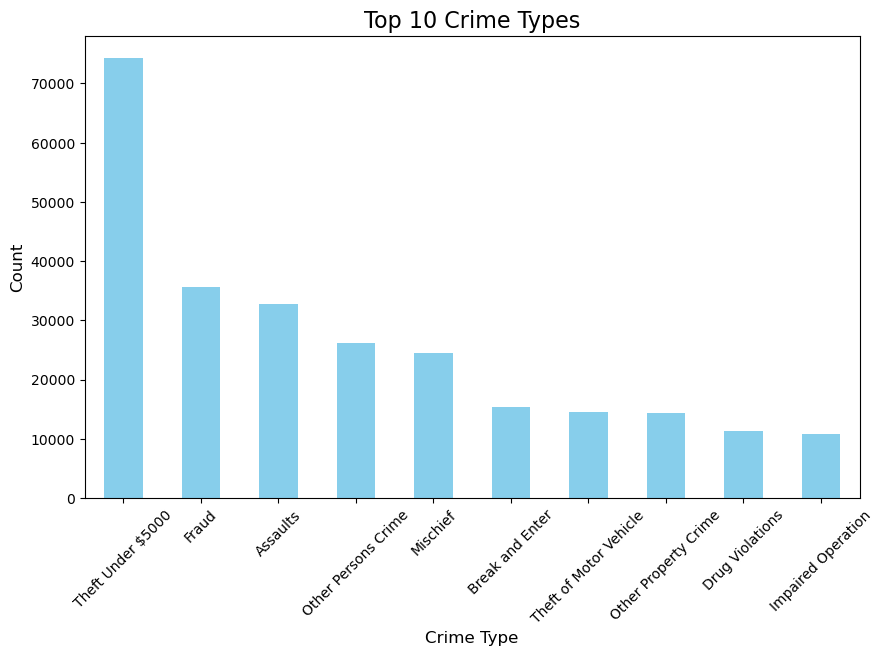

In [11]:
# Plot the most common crime types
plt.figure(figsize=(10, 6))
crime_type_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Crime Types', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [12]:
# Crime rates by municipality
municipality_crime_counts = crime_data_cleaned['municipality'].value_counts()
print("\nCrime rates by municipality:")
print(municipality_crime_counts)




Crime rates by municipality:
Vaughan                   95959
Markham                   66434
Richmond Hill             48392
Newmarket                 28653
Georgina                  16588
Aurora                    14653
East Gwillimbury           8107
Whitchurch-Stouffville     8107
King                       6179
Name: municipality, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11128\1451575041.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crime_data_cleaned['occ_month'] = crime_data_cleaned['occ_date'].dt.to_period('M')


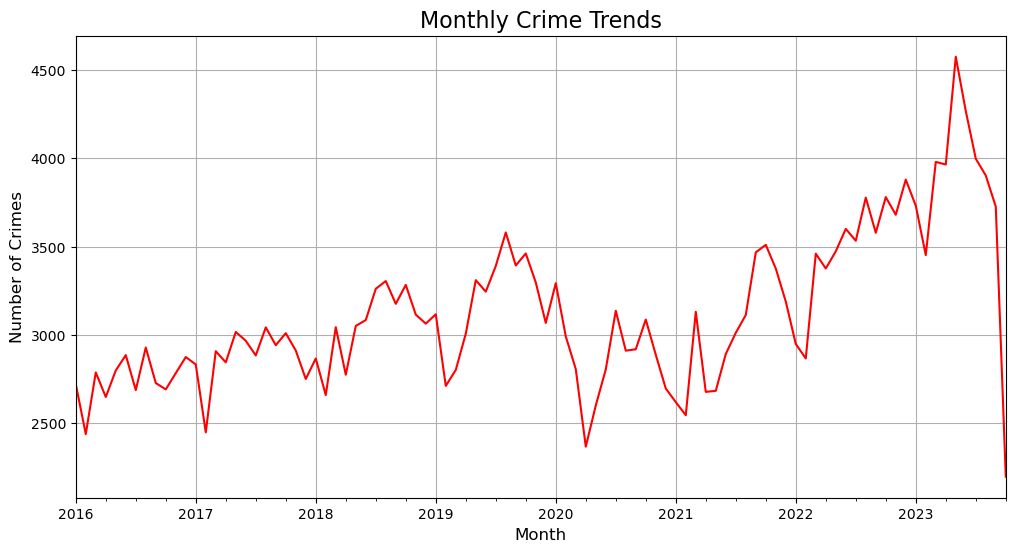

In [13]:
# Temporal patterns: Monthly trends
crime_data_cleaned['occ_month'] = crime_data_cleaned['occ_date'].dt.to_period('M')
monthly_crime_counts = crime_data_cleaned['occ_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_crime_counts.plot(kind='line', color='red')
plt.title('Monthly Crime Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid()
plt.show()



In [14]:
# Case resolution rates
resolution_rates = crime_data_cleaned['case_status'].value_counts(normalize=True) * 100
print("\nCase resolution rates (%):")
print(resolution_rates)



Case resolution rates (%):
Closed    52.169774
Solved    43.707690
Open       4.122536
Name: case_status, dtype: float64


# 5. What is the relationship between crime type and municipality?

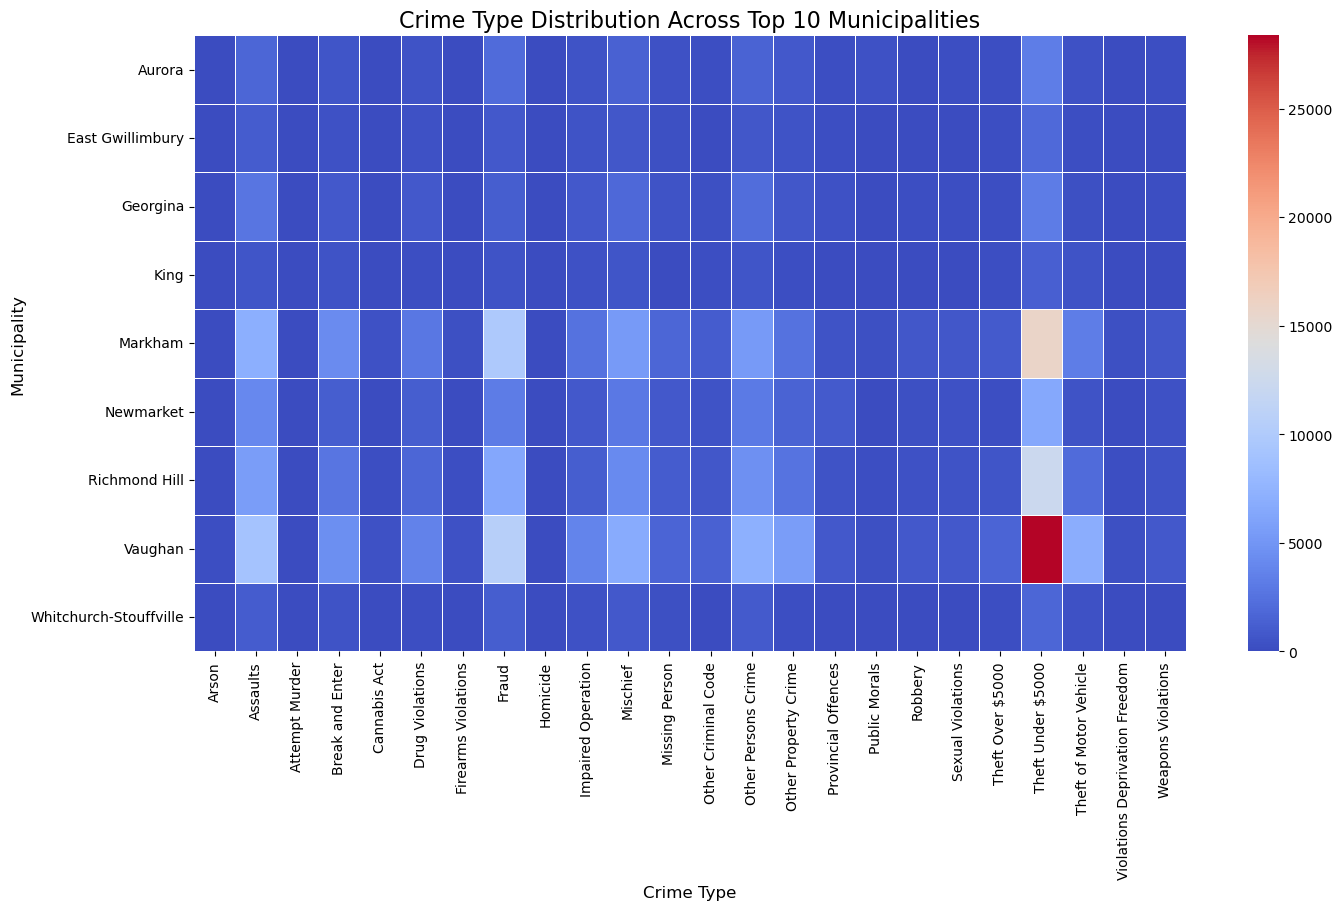

In [15]:
crime_municipality_pivot = crime_data_cleaned.pivot_table(index='municipality', columns='occ_type', aggfunc='size', fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(crime_municipality_pivot.head(10), cmap="coolwarm", annot=False, linewidths=.5)
plt.title('Crime Type Distribution Across Top 10 Municipalities', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.show()


In [ ]:
#Improved Heatmap: Crime Type vs. Municipality

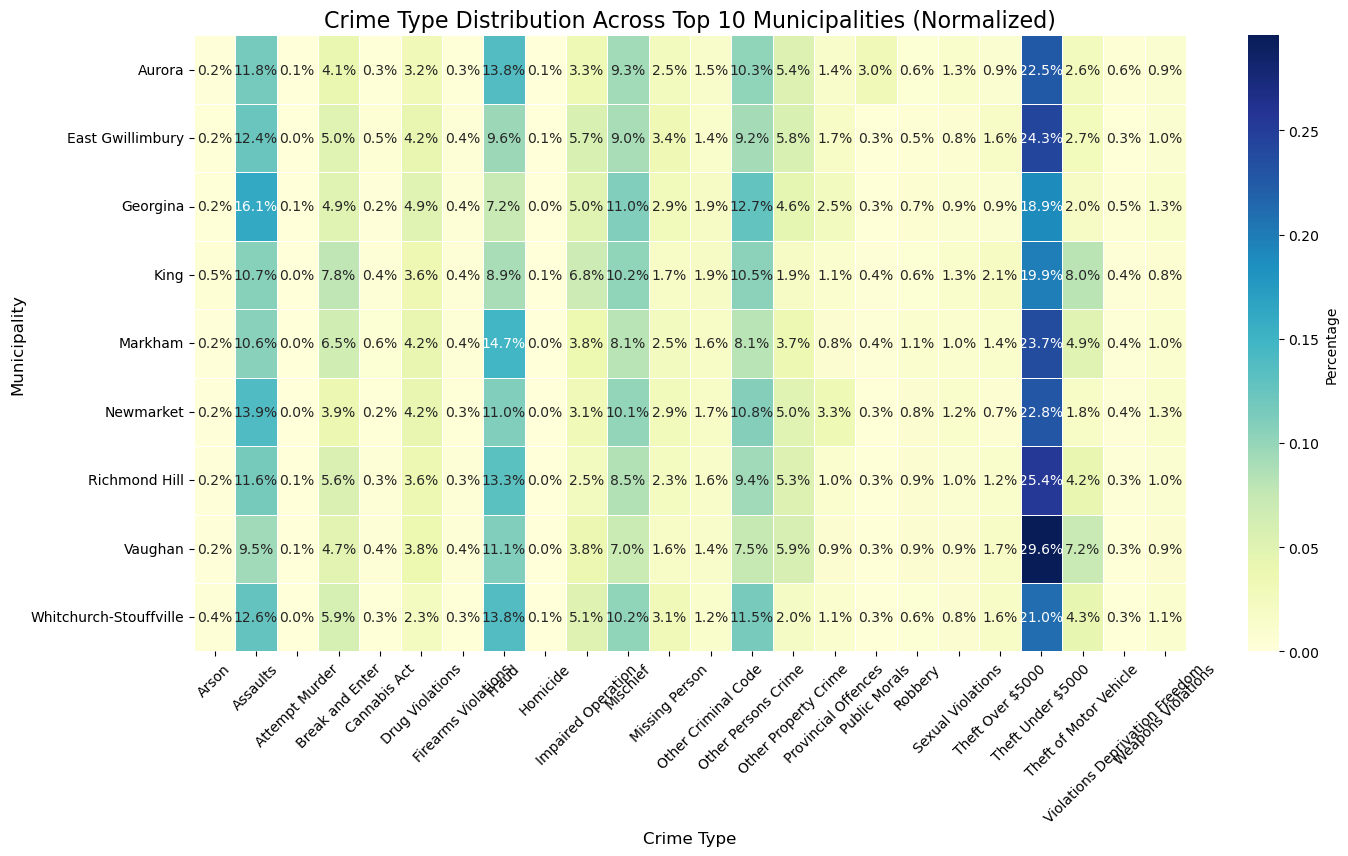

In [16]:
# Select top 10 municipalities by total crime count
top_municipalities = crime_data_cleaned['municipality'].value_counts().head(10).index
filtered_data = crime_data_cleaned[crime_data_cleaned['municipality'].isin(top_municipalities)]

# Create a pivot table with normalized values (percentages)
crime_municipality_pivot = (
    filtered_data.pivot_table(index='municipality', 
                              columns='occ_type', 
                              aggfunc='size', 
                              fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)  # Normalize row-wise
)

# Create an improved heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(crime_municipality_pivot, cmap="YlGnBu", annot=True, fmt=".1%", linewidths=.5, cbar_kws={'label': 'Percentage'})
plt.title('Crime Type Distribution Across Top 10 Municipalities (Normalized)', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Top 10 Municipalities by Crime Count: Instead of arbitrarily picking 10 rows, we filter based on crime frequency.
Normalization: Each municipality row is expressed as percentages, making trends more visible even if municipalities differ in size.
Annotations: Percentages are displayed directly on the heatmap for clarity.

In [ ]:
#6. Are crimes reported immediately, or is there a delay?

crime_data_cleaned['report_delay'] = (crime_data_cleaned['rep_date'] - crime_data_cleaned['occ_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(data=crime_data_cleaned, x='report_delay', bins=50, kde=True, color='purple')
plt.title('Distribution of Reporting Delays', fontsize=16)
plt.xlabel('Reporting Delay (days)', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.show()


In [18]:
#7. Do certain crime types involve more delays?

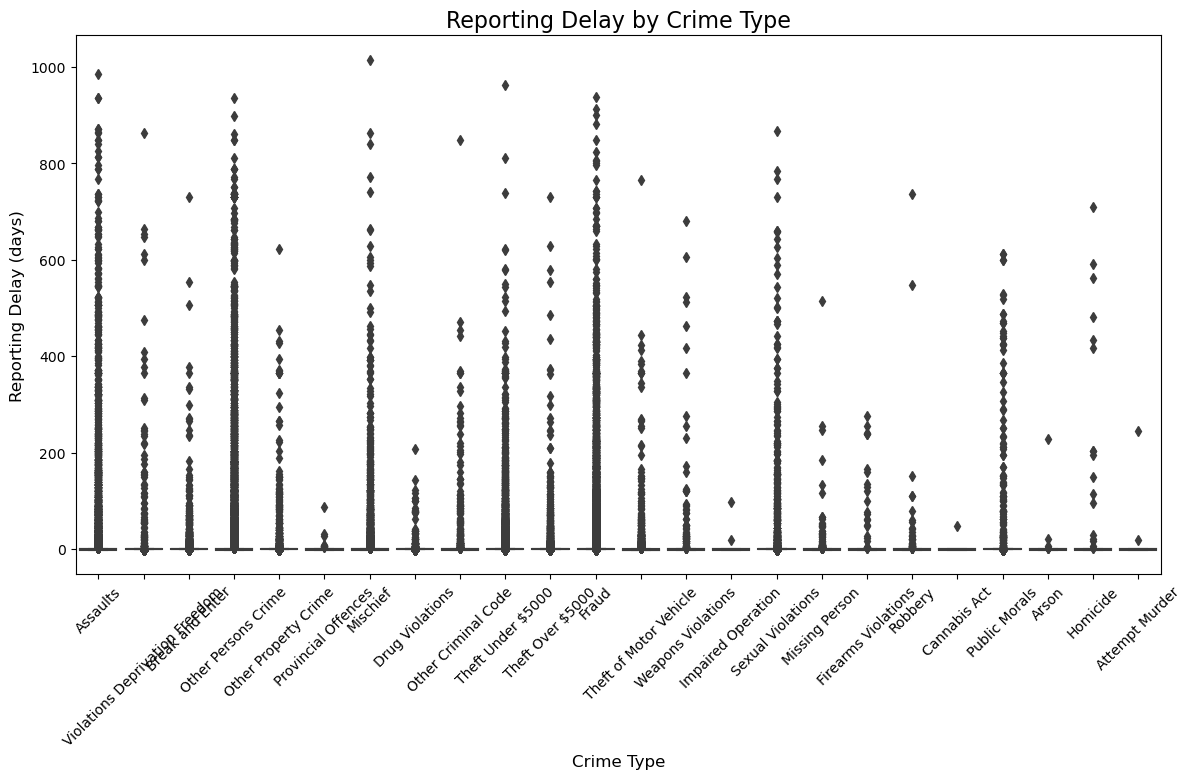

In [19]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=crime_data_cleaned, x='occ_type', y='report_delay', palette="muted")
plt.title('Reporting Delay by Crime Type', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Reporting Delay (days)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


1. Crime Type Trends Over Time
This visual answers: "How do specific crime types fluctuate over the months?"

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11128\1808585049.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crime_data_cleaned['occ_month'] = crime_data_cleaned['occ_date'].dt.to_period('M')


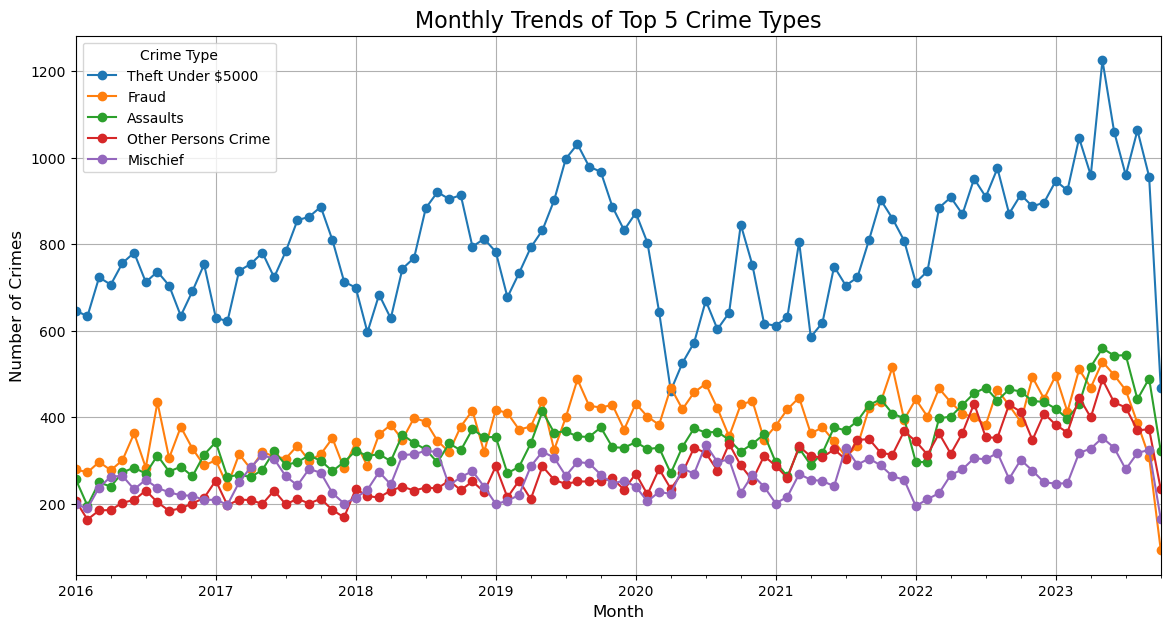

In [20]:
# Group data by month and crime type
crime_data_cleaned['occ_month'] = crime_data_cleaned['occ_date'].dt.to_period('M')
crime_type_monthly = crime_data_cleaned.groupby(['occ_month', 'occ_type']).size().unstack(fill_value=0)

# Plot trends for the top 5 crime types
top_crime_types = crime_data_cleaned['occ_type'].value_counts().head(5).index
crime_type_monthly[top_crime_types].plot(figsize=(14, 7), marker='o')

plt.title('Monthly Trends of Top 5 Crime Types', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(title='Crime Type', fontsize=10)
plt.grid()
plt.show()


2. Municipality-Wise Crime Breakdown (Stacked Bar Chart)
This visual answers: "What is the distribution of crime types in top municipalities?"

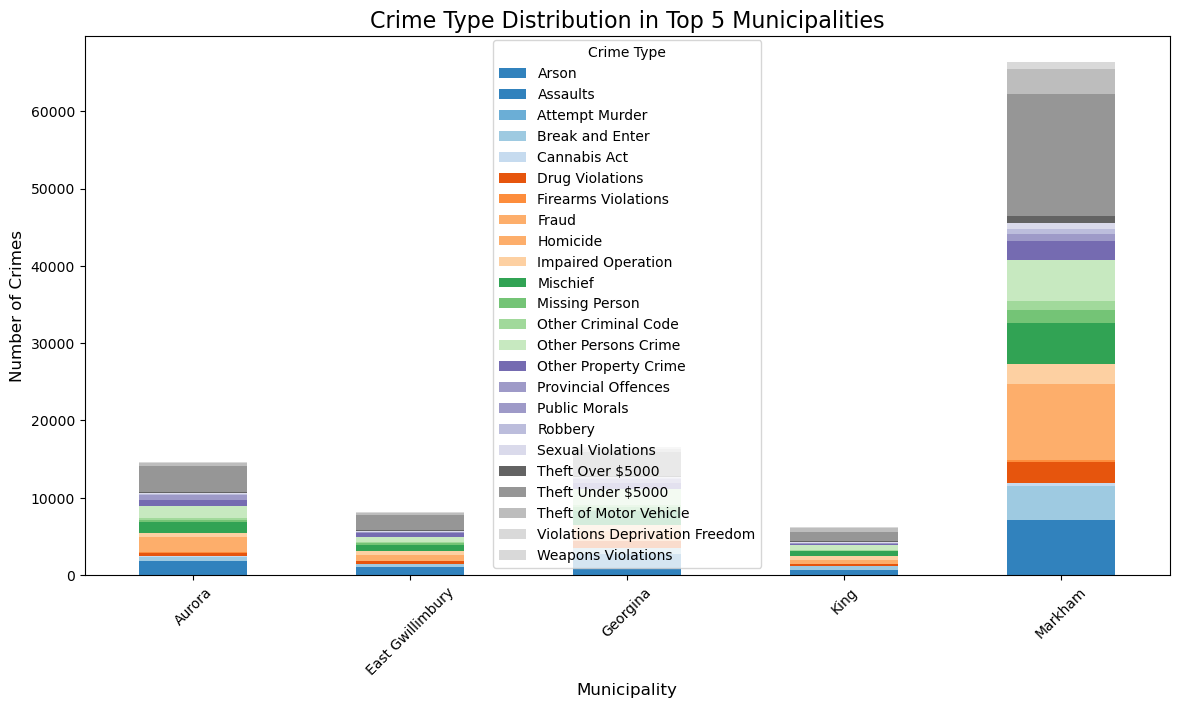

In [21]:
# Group data by municipality and crime type
municipality_crime_breakdown = filtered_data.groupby(['municipality', 'occ_type']).size().unstack(fill_value=0)

# Plot stacked bar chart for top 5 municipalities
municipality_crime_breakdown.head(5).plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20c')

plt.title('Crime Type Distribution in Top 5 Municipalities', fontsize=16)
plt.xlabel('Municipality', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(title='Crime Type', fontsize=10)
plt.xticks(rotation=45)
plt.show()


4. Day of the Week Analysis
This visual answers: "Are crimes more common on certain days of the week?"

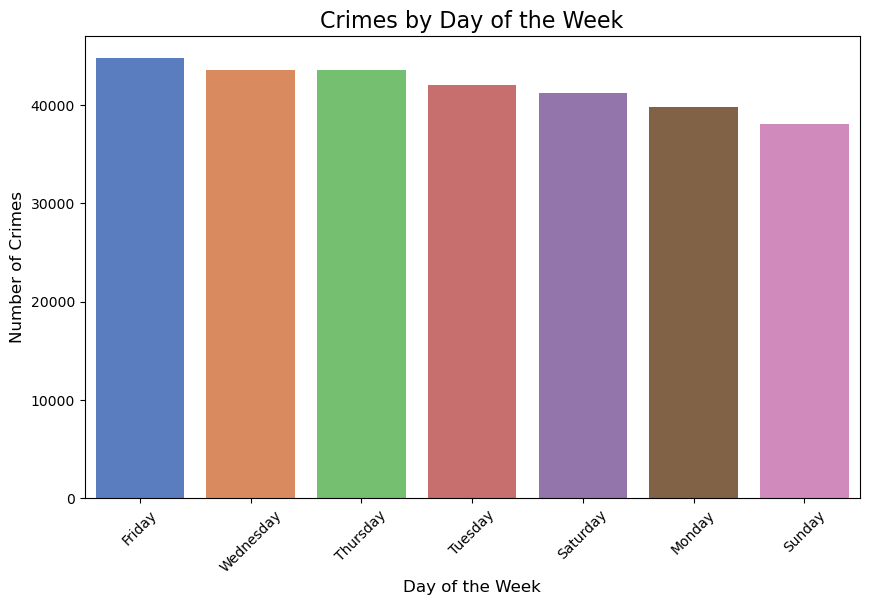

In [23]:
# Add a day of the week column
crime_data_cleaned['day_of_week'] = crime_data_cleaned['occ_date'].dt.day_name()

# Count crimes by day of the week
crimes_by_day = crime_data_cleaned['day_of_week'].value_counts()

# Plot crimes by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, palette="muted")
plt.title('Crimes by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Hourly Crime Distribution (Heatmap)
This visual answers: "What time of day do most crimes occur?"



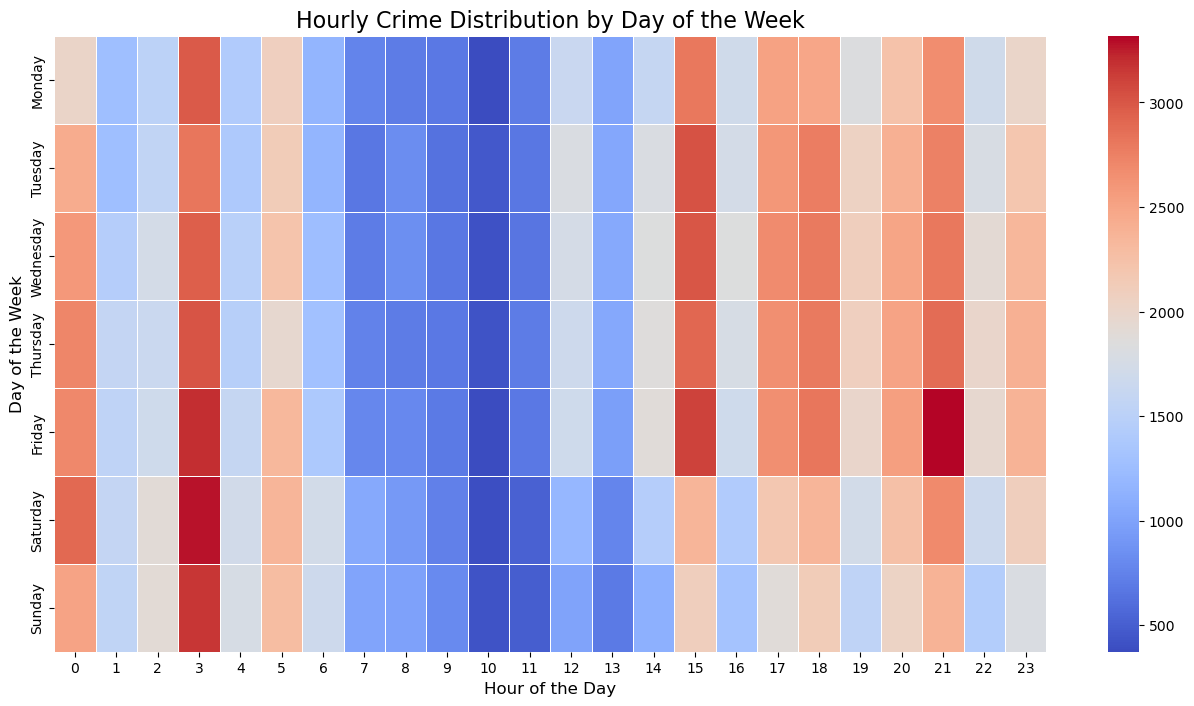

In [24]:
# Extract hour from occurrence date
crime_data_cleaned['occ_hour'] = crime_data_cleaned['occ_date'].dt.hour

# Create a pivot table for day of week vs. hour
hourly_crime = crime_data_cleaned.pivot_table(index='day_of_week', columns='occ_hour', aggfunc='size', fill_value=0)

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_crime = hourly_crime.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(hourly_crime, cmap="coolwarm", annot=False, linewidths=.5)
plt.title('Hourly Crime Distribution by Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.show()
